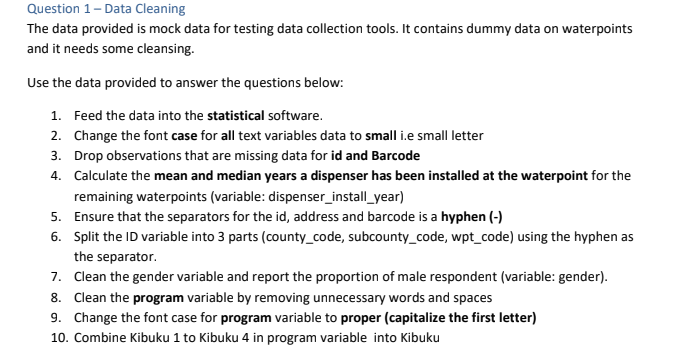

In [ ]:
Link to dataset - https://1drv.ms/x/s!AtZvPyAC7Lk1bxv1LoMzEnfbaT4

In [72]:
import pandas as pd
import matplotlib as plt
df=pd.read_excel(r'E:\MOCKDATA.xlsx')
df.head()

,ID,Wpt_Name,County,Subcounty,Gender,IP_Adress,Barcode,dispenser_install_year,program
0,341-074-EH498,Aufderhar-Bins,Fenshui,NaN,Bigender,99-35-53-139,42283-004,1993.0,Kibuku 1
1,562-184-QY233,Von-Kuhn,Chengyang,Qilin,Female,99-220-88-86,45802-132,1998.0,Kibuku 2
2,242-833-HC888,Leannon LLC,Kista,ItajuÃ­pe,Polygender,99-158-200-170,59676-562,1996.0,Kibuku 3
3,773-513-LI203,"Prohaska, VonRueden and Franecki",Hexi,Portumna,Male,99-131-237-138,49035-154,1992.0,Kibuku 4
4,933-270-VD590,McClure and Sons,Carvalho,DziÄ™gielÃ³w,Female,98-86-173-226,55154-4727,2008.0,Kibuku 2


In [73]:
data=df.copy()

In [74]:
data.dtypes

ID                         object
Wpt_Name                   object
County                     object
Subcounty                  object
Gender                     object
IP_Adress                  object
Barcode                    object
dispenser_install_year    float64
program                    object
dtype: object

In [75]:
#Change the font case for all text variables to small ie small letter
data['Wpt_Name']=data['Wpt_Name'].str.lower()
data['County']=data['County'].str.lower()
data['Subcounty']=data['Subcounty'].str.lower()
data['Gender']=data['Gender'].str.lower()
data['program']=data['program'].str.lower()


In [76]:
data.head()

,ID,Wpt_Name,County,Subcounty,Gender,IP_Adress,Barcode,dispenser_install_year,program
0,341-074-EH498,aufderhar-bins,fenshui,NaN,bigender,99-35-53-139,42283-004,1993.0,kibuku 1
1,562-184-QY233,von-kuhn,chengyang,qilin,female,99-220-88-86,45802-132,1998.0,kibuku 2
2,242-833-HC888,leannon llc,kista,itajuã­pe,polygender,99-158-200-170,59676-562,1996.0,kibuku 3
3,773-513-LI203,"prohaska, vonrueden and franecki",hexi,portumna,male,99-131-237-138,49035-154,1992.0,kibuku 4
4,933-270-VD590,mcclure and sons,carvalho,dziä™gielã³w,female,98-86-173-226,55154-4727,2008.0,kibuku 2


In [77]:
# Drop observations that are missing data for id and Barcode
#data.isnull()
data=data.dropna(subset=['ID'])
data=data.dropna(subset=['Barcode'])


In [78]:
# Confirm we have dropped the NA values for ID and Barcode
data.isna().sum()

ID                         0
Wpt_Name                   0
County                     0
Subcounty                 92
Gender                     0
IP_Adress                  0
Barcode                    0
dispenser_install_year     0
program                    0
dtype: int64

In [79]:
df.isna().sum()

ID                         34
Wpt_Name                    0
County                      0
Subcounty                 104
Gender                      0
IP_Adress                   0
Barcode                    68
dispenser_install_year     65
program                     0
dtype: int64

In [44]:
#Calculate the mean and median years a dispenser has been installed at the waterpoint for the remaining waterpoints (variable: dispenser_install_year)
data['dispenser_install_year'].mean()


2000.4239733629302

In [45]:
data['dispenser_install_year'].median()

2002.0

In [47]:
#Ensure that the separators for the id, address and barcode is a hyphen (-)
#import re
data.head()



,ID,Wpt_Name,County,Subcounty,Gender,IP_Adress,Barcode,dispenser_install_year,program
0,341-074-EH498,aufderhar-bins,fenshui,NaN,bigender,99-35-53-139,42283-004,1993.0,kibuku 1
1,562-184-QY233,von-kuhn,chengyang,qilin,female,99-220-88-86,45802-132,1998.0,kibuku 2
2,242-833-HC888,leannon llc,kista,itajuã­pe,polygender,99-158-200-170,59676-562,1996.0,kibuku 3
3,773-513-LI203,"prohaska, vonrueden and franecki",hexi,portumna,male,99-131-237-138,49035-154,1992.0,kibuku 4
4,933-270-VD590,mcclure and sons,carvalho,dziä™gielã³w,female,98-86-173-226,55154-4727,2008.0,kibuku 2


In [50]:
#Split the ID variable into 3 parts (county_code, subcounty_code, wpt_code) using the hyphen as the separator.
data[['country_code','subcounty_code','wpt_code']]=data['ID'].str.split("-",expand=True)
data

,ID,Wpt_Name,County,Subcounty,Gender,IP_Adress,Barcode,dispenser_install_year,program,country_code,subcounty_code,wpt_code
0,341-074-EH498,aufderhar-bins,fenshui,NaN,bigender,99-35-53-139,42283-004,1993.0,kibuku 1,341,074,EH498
1,562-184-QY233,von-kuhn,chengyang,qilin,female,99-220-88-86,45802-132,1998.0,kibuku 2,562,184,QY233
2,242-833-HC888,leannon llc,kista,itajuã­pe,polygender,99-158-200-170,59676-562,1996.0,kibuku 3,242,833,HC888
3,773-513-LI203,"prohaska, vonrueden and franecki",hexi,portumna,male,99-131-237-138,49035-154,1992.0,kibuku 4,773,513,LI203
4,933-270-VD590,mcclure and sons,carvalho,dziä™gielã³w,female,98-86-173-226,55154-4727,2008.0,kibuku 2,933,270,VD590
...,...,...,...,...,...,...,...,...,...,...,...,...
993,698-209-RI387,"gutkowski, marks and yost",chakari,birmingham,polygender,100-85-58-114,0603-5689,1997.0,kibuku 3,698,209,RI387
995,060-082-FN185,"beier, turner and rolfson",luå¾e,NaN,male,100-40-166-210,13533-635,2001.0,kibuku 3,060,082,FN185
996,889-414-HF342,fritsch inc,mã¼nchen,santana,male,100-251-190-57,55111-357,2011.0,mbale,889,414,HF342
997,798-495-JU008,wisozk-herzog,shinpokh,oeleon,genderqueer,100-249-126-135,13668-092,1998.0,mbale,798,495,JU008


In [56]:
#Clean the gender variable and report the proportion of male respondent (variable: gender).
#data.Gender.unique()
#df.Gender.isna().sum()  # There no null values in the column Gender

item_counts = data["Gender"].value_counts()
print(item_counts)


male           125
agender        125
polygender     118
non-binary     113
genderqueer    110
genderfluid    107
female         106
bigender        97
Name: Gender, dtype: int64


In [58]:
data['Gender'].value_counts(normalize=True)*1

male           0.138735
agender        0.138735
polygender     0.130966
non-binary     0.125416
genderqueer    0.122087
genderfluid    0.118757
female         0.117647
bigender       0.107658
Name: Gender, dtype: float64

In [60]:
#Clean the program variable by removing unnecessary words and spaces
data['program'].unique()

array(['kibuku 1', 'kibuku 2', 'kibuku 3', 'kibuku 4', 'pallisa', 'mbale',
       'tororo', "mbale'", 'tororo ', 'tororo.', 'pallisa,'], dtype=object)

In [65]:
data['program']=data['program'].replace(['tororo ','tororo.'],'tororo')
data['program']=data['program'].replace(['pallisa,'],'pallisa')
data['program']=data['program'].replace(["mbale'"],'mbale')

In [66]:
data['program'].unique()

array(['kibuku 1', 'kibuku 2', 'kibuku 3', 'kibuku 4', 'pallisa', 'mbale',
       'tororo'], dtype=object)

In [70]:
#Change the font case for program variable to proper (capitalize the first letter)

data = data.rename(columns={"program":"Program"})
data

,ID,Wpt_Name,County,Subcounty,Gender,IP_Adress,Barcode,dispenser_install_year,Program,country_code,subcounty_code,wpt_code
0,341-074-EH498,aufderhar-bins,fenshui,NaN,bigender,99-35-53-139,42283-004,1993.0,kibuku 1,341,074,EH498
1,562-184-QY233,von-kuhn,chengyang,qilin,female,99-220-88-86,45802-132,1998.0,kibuku 2,562,184,QY233
2,242-833-HC888,leannon llc,kista,itajuã­pe,polygender,99-158-200-170,59676-562,1996.0,kibuku 3,242,833,HC888
3,773-513-LI203,"prohaska, vonrueden and franecki",hexi,portumna,male,99-131-237-138,49035-154,1992.0,kibuku 4,773,513,LI203
4,933-270-VD590,mcclure and sons,carvalho,dziä™gielã³w,female,98-86-173-226,55154-4727,2008.0,kibuku 2,933,270,VD590
...,...,...,...,...,...,...,...,...,...,...,...,...
993,698-209-RI387,"gutkowski, marks and yost",chakari,birmingham,polygender,100-85-58-114,0603-5689,1997.0,kibuku 3,698,209,RI387
995,060-082-FN185,"beier, turner and rolfson",luå¾e,NaN,male,100-40-166-210,13533-635,2001.0,kibuku 3,060,082,FN185
996,889-414-HF342,fritsch inc,mã¼nchen,santana,male,100-251-190-57,55111-357,2011.0,mbale,889,414,HF342
997,798-495-JU008,wisozk-herzog,shinpokh,oeleon,genderqueer,100-249-126-135,13668-092,1998.0,mbale,798,495,JU008
